In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
cd gdrive/MyDrive

/content/gdrive/MyDrive


In [7]:
import argparse
import numpy as np
import random
import time
import math

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
from torch import IntTensor

# from train_emotion6 import train_emotion6
# from models.pretrained_resnet152 import pretrained_resnet152
from normalization import normalization_parameter, Normalize
from classplot import class_plot

In [8]:
import torch.nn as nn
from torchvision import models


class pretrained_resnet152(nn.Module):

    def __init__(self, freeze=True, n_classes=12):
        super(pretrained_resnet152, self).__init__()

        self.pretrained = models.resnet152(pretrained=True)

        if freeze:
            for param in self.pretrained.parameters():
                param.requires_grad = False

        n_inputs = self.pretrained.fc.out_features

        self.l1 = nn.Linear(n_inputs, 1024)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.4)
        self.l2 = nn.Linear(1024, n_classes)
        self.LogSoftmax = nn.LogSoftmax(dim=1)

    def forward(self, input):
        x = self.pretrained(input)
        x = x.view(x.size(0), -1) 
        x = self.l1(x)
        x = self.relu(x)
        # x = self.dropout(x)       
        x = self.l2(x)
        x = self.LogSoftmax(x)

        return x

In [13]:
class pretrained_inception(nn.Module):

    def __init__(self, freeze=True, n_classes=12):
        super(pretrained_inception, self).__init__()

        self.pretrained = models.inception_v3(pretrained=True)

        if freeze:
            for param in self.pretrained.parameters():
                param.requires_grad = False

        n_inputs = self.pretrained.fc.out_features
  
        self.l1 = nn.Linear(n_inputs, 1024)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.4)
        self.l2 = nn.Linear(1024, n_classes)
        self.LogSoftmax = nn.LogSoftmax(dim=1)

    def forward(self, input):
        x = self.pretrained(input)
        x = x.view(x.size(0), -1) 
        x = self.l1(x)
        x = self.relu(x)
        # x = self.dropout(x)       
        x = self.l2(x)
        x = self.LogSoftmax(x)

        return x

In [ ]:
random_seed = 42

torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
imsize = 300
batch_size=32
test_size = 0.2
epochs = 10
lr = 0.001
patience = 5

In [ ]:
transform = transforms.Compose([transforms.Resize(size=(imsize, imsize)),
                                                      transforms.ToTensor()])

In [ ]:
all_data = datasets.ImageFolder(root='./datasets/animal_face_dataset')

In [ ]:
len(all_data)

3137

In [ ]:
test_data_len = int(len(all_data) * test_size)

In [ ]:
train_data_len = len(all_data) - test_data_len * 2

In [ ]:
train_data, valid_data, test_data = random_split(all_data, [train_data_len, test_data_len, test_data_len])
print('len(train_data) : {}, len(valid_data) : {}, len(test_data) : {}'.fotmat(len(train_data), len(valid_data), len(test_data))) # 각 데이터 길이 확인

In [ ]:
train_data.dataset.transform = transform

In [ ]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [ ]:
mean, std = normalization_parameter(train_loader)

In [ ]:
classes = all_data.classes
print('classes =', classes)

classes = ['chicken', 'cow', 'dog', 'horse', 'monkey', 'mouse', 'pig', 'rabbit', 'sheep', 'snake', 'tiger']


In [ ]:
train_transforms = transforms.Compose([transforms.RandomHorizontalFlip(),
                                                                  transforms.RandomRotation(degrees=10),
                                                                  transforms.Resize(size=(imsize, imsize)),
                                                                  transforms.ToTensor(),
                                                                  transforms.Normalize(mean, std)])

test_transforms = transforms.Compose([transforms.Resize(size=(imsize, imsize)),
                                                                  transforms.ToTensor(),
                                                                  transforms.Normalize(mean, std)])

In [ ]:
train_data.dataset.transform = train_transforms
valid_data.dataset.transform = test_transforms
test_data.dataset.transform = test_transforms

In [ ]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=False)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [ ]:
dataloaders = {'train' : train_loader, 'valid' : valid_loader, 'test' : test_loader}

In [ ]:
decoder = {}
for i in range(len(classes)):
  decoder[classes[i]] = i

print(decoder)

{'chicken': 0, 'cow': 1, 'dog': 2, 'horse': 3, 'monkey': 4, 'mouse': 5, 'pig': 6, 'rabbit': 7, 'sheep': 8, 'snake': 9, 'tiger': 10}


In [ ]:
encoder = {}
for i in range(len(classes)):
  encoder[i] = classes[i]

print(encoder)

{0: 'chicken', 1: 'cow', 2: 'dog', 3: 'horse', 4: 'monkey', 5: 'mouse', 6: 'pig', 7: 'rabbit', 8: 'sheep', 9: 'snake', 10: 'tiger'}


In [ ]:
inv_normalize = transforms.Normalize(
    mean=-1 * np.divide(mean, std),
    std = 1 / std
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


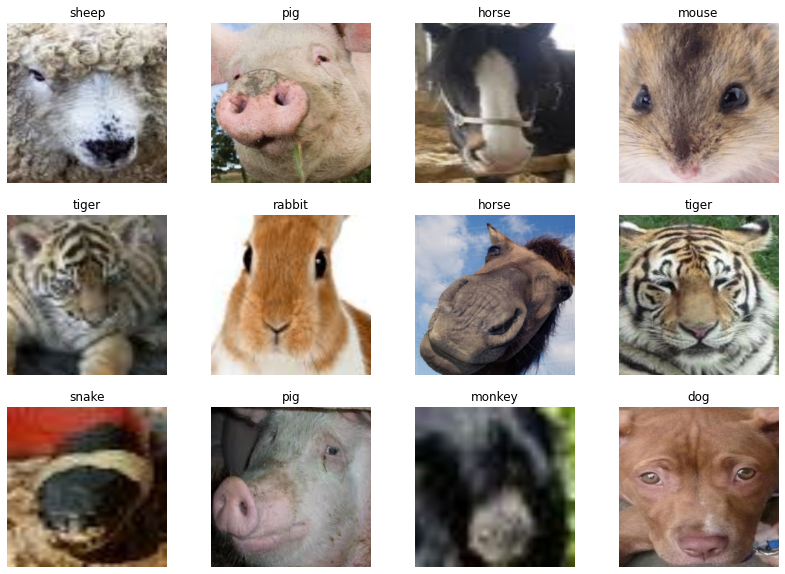

In [ ]:
class_plot(train_data, encoder, inv_normalize=inv_normalize, random_seed=1442)

In [ ]:
def train_model(train_class, model, dataloaders, criterion, encoder, num_epochs=10, lr=0.001, batch_size=32, patience=None, classes=None, rgb=False, inv_normalize=None):
  train_class.model = model
  train_class.lr = lr
  
  dataloader_train = {}
  losses = list()
  accuracy = list()
  key = dataloaders.keys()

  for phase in key:
    if (phase == 'test'):
      perform_test = True
    else:
      dataloader_train.update([(phase, dataloaders[phase])])

  train_losses, train_acc, valid_losses, valid_acc = train_class.train(dataloader_train, criterion, num_epochs, batch_size, patience)

  train_class.error_plot(valid_losses)
  train_class.acc_plot(valid_acc)

  if (perform_test == True):
    true, pred, image, true_wrong, pred_wrong, epoch_acc, epoch_loss = train_class.test(dataloaders['test'], criterion, batch_size) 

    train_class.wrong_plot(12, true_wrong, image, pred_wrong, encoder, inv_normalize=inv_normalize)
    train_class.performance_matrix(true, pred)

    if classes != None:
      train_class.plot_confusion_matrix(true, pred, classes=classes, title='Confusion matrix, without normalization')

  return train_class.model 

In [ ]:
classifier = pretrained_resnet152(freeze=True, n_classes=len(classes)).to(device)
criterion = nn.CrossEntropyLoss()

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math

import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import transforms
from torch.autograd import Variable
from sklearn import metrics
from collections import Counter
from sklearn import cluster

# from normalization import Normalize


class train_emotion6:
    def __init__(self, random_seed=None):
        """
        Args:
            mean (float): ===========================================================
            std (float): ============================================================
            attention_list (list): Receive a list of colors you want to give attention
            random_seed (int): Seed to fix the result
        """

        if random_seed is not None:
            torch.manual_seed(random_seed)
            torch.cuda.manual_seed(random_seed)
            #torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
            #torch.backends.cudnn.deterministic = True
            torch.backends.cudnn.benchmark = False
            np.random.seed(random_seed)
            random.seed(random_seed)

        self.model = None
        self.lr = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.earlystop = None

    # train
    def train(self, dataloaders, criterion, num_epochs, batch_size, patience):
        self.model.to(self.device)
        best_acc = 0.0
        phases = dataloaders.keys()

        train_losses = list()
        train_acc = list()
        valid_losses = list()
        valid_acc = list()

        # EarlyStopping
        if (patience != None):
            self.earlystop = EarlyStopping(patience=patience, verbose=True)

        for epoch in range(1, num_epochs + 1):
            print('Epoch {}/{}'.format(epoch, num_epochs))
            print('----------')
            optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

            # if (epoch % 10 == 0):
            #     self.lr *= 0.9

            for phase in phases:
                # Train
                if phase == 'train':

                    self.model.train()
                    running_loss = 0.0
                    running_corrects = 0
                    total = 0
                    j = 0

                    for batch_idx, (data, target) in enumerate(dataloaders[phase]):
                        data, target = Variable(data), Variable(target)
                        data = data.type(torch.cuda.FloatTensor)
                        target = target.type(torch.cuda.LongTensor)
                        optimizer.zero_grad()
                        output = self.model(data)
                        loss = criterion(output, target)
                        _, preds = torch.max(output, 1)
                        running_corrects = running_corrects + torch.sum(preds == target.data)
                        running_loss += loss.item() * data.size(0)
                        j = j + 1

                        loss.backward()
                        optimizer.step()
                                                                                                 
                    epoch_acc = running_corrects.double() / (len(dataloaders[phase])*batch_size)
                    epoch_loss = running_loss / (len(dataloaders[phase])*batch_size)

                    train_losses.append(epoch_loss)
                    train_acc.append(epoch_acc)
                
                # Valid
                else:
                    with torch.no_grad():
                        self.model.eval()
                        running_loss = 0.0
                        running_corrects = 0
                        total = 0
                        j = 0

                        for batch_idx, (data, target) in enumerate(dataloaders[phase]):
                            data, target = Variable(data), Variable(target)
                            data = data.type(torch.cuda.FloatTensor)
                            target = target.type(torch.cuda.LongTensor)
                            optimizer.zero_grad()
                            output = self.model(data)

                            loss = criterion(output, target)
                            _, preds = torch.max(output, 1)
                            running_corrects = running_corrects + torch.sum(preds == target.data)
                            running_loss += loss.item() * data.size(0)
                            j = j + 1

                        epoch_acc = running_corrects.double() / (len(dataloaders[phase])*batch_size)
                        epoch_loss = running_loss / (len(dataloaders[phase])*batch_size)

                        valid_losses.append(epoch_loss)
                        valid_acc.append(epoch_acc)

                print('{} Epoch: {}\tLoss: {:.6f} \tAcc: {:.6f}'.format(phase, epoch, running_loss / (j * batch_size), running_corrects.double() / (j * batch_size)))
                
                if phase == 'valid' and (patience != None):
                    self.earlystop(epoch_loss, self.model)  # early stop with valid loss 

            # print('EalryStop :', self.earlystop.early_stop)

            if (patience != None) and (self.earlystop.early_stop):
                print("Early stopping")
                self.model.load_state_dict(torch.load('./checkpoint.pt'))
                break

            # print('{} Accuracy: '.format(phase),epoch_acc.item())
            print()

        return train_losses, train_acc, valid_losses, valid_acc

    # test
    def test(self, dataloader, criterion, batch_size):
        with torch.no_grad():
            self.model.eval()
            running_corrects = 0
            running_loss = 0
            pred = []
            true = []
            pred_wrong = []
            true_wrong = []
            image = []
            # sm = nn.LogSoftmax(dim=1)

            for batch_idx, (data, target) in enumerate(dataloader):
                data, target = Variable(data), Variable(target)
                data = data.type(torch.cuda.FloatTensor)
                target = target.type(torch.cuda.LongTensor)
                output = self.model(data)

                # need attention here
                
                loss = criterion(output, target)
                # output = sm(output)
                _, preds = torch.max(output, 1)
                running_corrects = running_corrects + torch.sum(preds == target.data)
                running_loss += loss.item() * data.size(0)
                preds = preds.cpu().numpy()
                target = target.cpu().numpy()
                preds = np.reshape(preds, (len(preds), 1))
                target = np.reshape(target, (len(preds), 1))
                data = data.cpu().numpy()

                for i in range(len(preds)):
                    pred.append(preds[i])
                    true.append(target[i])
                    if(preds[i] != target[i]):
                        pred_wrong.append(preds[i])
                        true_wrong.append(target[i])
                        image.append(data[i])

            epoch_acc = running_corrects.double()/(len(dataloader)*batch_size)
            epoch_loss = running_loss/(len(dataloader)*batch_size)

            print(epoch_acc, epoch_loss)

            return true, pred, image, true_wrong, pred_wrong, epoch_acc, epoch_loss

    def error_plot(self, loss):
        plt.figure(figsize=(10, 5))
        plt.plot(loss)
        plt.title("Valid loss plot")
        plt.xlabel("epochs")
        plt.ylabel("Loss")
        plt.show()


    def acc_plot(self, acc):
        plt.figure(figsize=(10, 5))
        plt.plot(acc)
        plt.title("Valid accuracy plot")
        plt.xlabel("epochs")
        plt.ylabel("accuracy")
        plt.show()

    # To plot the wrong predictions given by model
    def wrong_plot(self, n_figures, true, ima, pred, encoder, inv_normalize):
        print('Classes in order Actual and Predicted')
        n_row = int(n_figures/3)
        fig, axes = plt.subplots(figsize=(14, 10), nrows=n_row, ncols=3)
        for ax in axes.flatten():
            a = random.randint(0, len(true)-1)

            image, correct, wrong = ima[a], true[a], pred[a]
            image = torch.from_numpy(image)
            correct = int(correct)
            c = encoder[correct]
            wrong = int(wrong)
            w = encoder[wrong]
            f = 'A:'+c + ',' + 'P:'+w
            if inv_normalize != None:
                image = inv_normalize(image)
            image = image.numpy().transpose(1, 2, 0)
            im = ax.imshow(image)
            ax.set_title(f)
            ax.axis('off')
        plt.show()

    def plot_confusion_matrix(self, y_true, y_pred, classes,
                            normalize=False,
                            title=None,
                            cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if not title:
            if normalize:
                title = 'Normalized confusion matrix'
            else:
                title = 'Confusion matrix, without normalization'

        # Compute confusion matrix
        cm = metrics.confusion_matrix(y_true, y_pred)
        # Only use the labels that appear in the data
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        fig, ax = plt.subplots()
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        # We want to show all ticks...
        ax.set(xticks=np.arange(cm.shape[1]),
            yticks=np.arange(cm.shape[0]),
            # ... and label them with the respective list entries
            xticklabels=classes, yticklabels=classes,
            title=title,
            ylabel='True label',
            xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], fmt),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
        fig.tight_layout()
        return ax

    def performance_matrix(self, true, pred):
        precision = metrics.precision_score(true, pred, average='macro')
        recall = metrics.recall_score(true, pred, average='macro')
        accuracy = metrics.accuracy_score(true, pred)
        f1_score = metrics.f1_score(true, pred, average='macro')
        print('Precision: {} Recall: {}, Accuracy: {}: ,f1_score: {}'.format(
            precision* 100, recall* 100, accuracy* 100, f1_score* 100))
            

# EarlyStopping
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""

    def __init__(self, patience=7, verbose=False):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score:
            self.counter += 1
            print(
                f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(
                f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss


In [ ]:
train_animal = train_emotion6(random_seed=random_seed)

Epoch 1/10
----------
train Epoch: 1	Loss: 0.787893 	Acc: 0.737818
valid Epoch: 1	Loss: 0.404398 	Acc: 0.842188
Validation loss decreased (inf --> 0.404398).  Saving model ...

Epoch 2/10
----------
train Epoch: 2	Loss: 0.407494 	Acc: 0.862288
valid Epoch: 2	Loss: 0.406744 	Acc: 0.848438
EarlyStopping counter: 1 out of 5

Epoch 3/10
----------
train Epoch: 3	Loss: 0.270860 	Acc: 0.910487
valid Epoch: 3	Loss: 0.596655 	Acc: 0.815625
EarlyStopping counter: 2 out of 5

Epoch 4/10
----------
train Epoch: 4	Loss: 0.259478 	Acc: 0.921610
valid Epoch: 4	Loss: 0.621995 	Acc: 0.828125
EarlyStopping counter: 3 out of 5

Epoch 5/10
----------
train Epoch: 5	Loss: 0.219727 	Acc: 0.934322
valid Epoch: 5	Loss: 0.623269 	Acc: 0.831250
EarlyStopping counter: 4 out of 5

Epoch 6/10
----------
train Epoch: 6	Loss: 0.186806 	Acc: 0.940148
valid Epoch: 6	Loss: 0.750018 	Acc: 0.839063
EarlyStopping counter: 5 out of 5
Early stopping


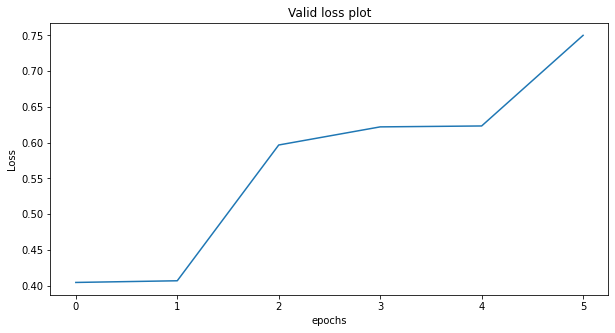

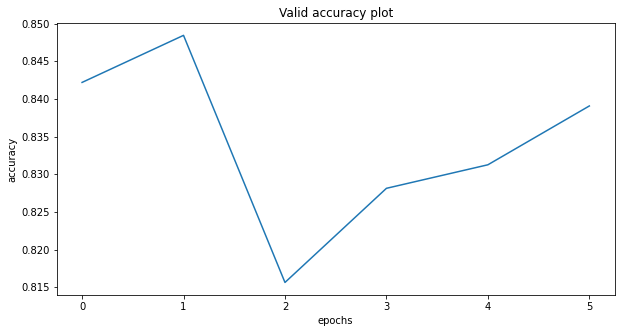

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.8156, device='cuda:0', dtype=torch.float64) 0.4825845269486308
Classes in order Actual and Predicted


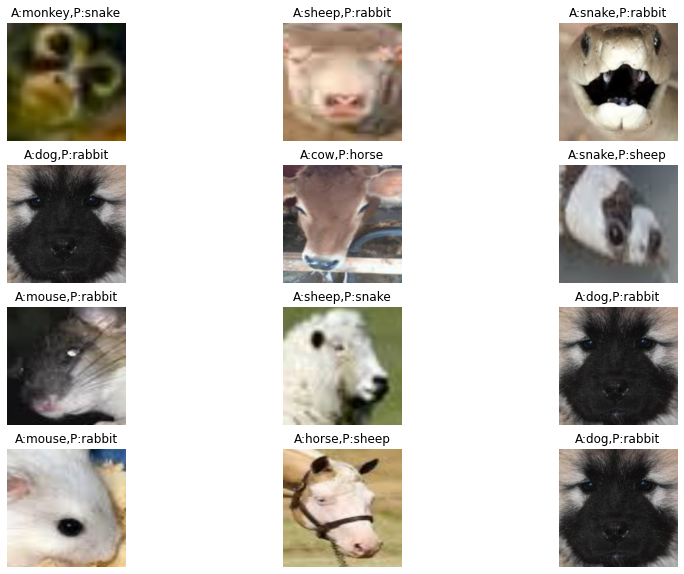

Precision: 83.78049639674843 Recall: 82.14953692893864, Accuracy: 83.25358851674642: ,f1_score: 82.58426545817025
Confusion matrix, without normalization
[[41  0  0  0  0  0  0  0  0  1  0]
 [ 0 44  0  2  2  2  1  0  1  2  0]
 [ 0  0 51  0  0  0  0  1  0  0  0]
 [ 1  4  0 35  0  0  2  2  5  1  0]
 [ 0  1  0  0 42  0  1  1  1  4  0]
 [ 0  0  0  0  3 25  1  6  2  1  0]
 [ 1  1  0  0  1  3 45  4  9  4  0]
 [ 1  0  0  0  2  1  0 70  1  1  0]
 [ 0  2  0  0  3  2  2  4 26  5  0]
 [ 0  0  0  0  1  1  2  2  3 95  0]
 [ 0  0  0  0  0  0  0  0  0  1 48]]


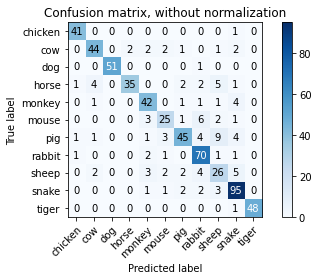

In [ ]:
model = train_model(train_animal, classifier, dataloaders, criterion=criterion, encoder=encoder, num_epochs=epochs, lr=lr, batch_size=batch_size, patience=patience, classes=classes, inv_normalize=inv_normalize)

In [ ]:
from PIL import Image

image = Image.open('./datasets/face_test_data/face1.jpg')
image = image.resize((imsize, imsize))
numpy_image1 = np.array(image)
print(numpy_image1.shape)
image = torch.from_numpy(numpy_image1)

test_transforms = transforms.Compose([transforms.Resize(size=(imsize, imsize)),
                                                                  transforms.ToTensor(),
                                                                  transforms.Normalize(mean, std)])

image.test_transforms

test_image = DataLoader(image, batch_size=batch_size, shuffle=True)
print(image.shape)

(300, 300, 3)
torch.Size([300, 300, 3])


In [ ]:
# model(test_image)

RuntimeError: ignored